In [69]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


from tkinter import *
from math import *


objectx=[]
objecty=[]


NUMNUM=700
numberline=NUMNUM
numberpoint=NUMNUM

gamma=0.07
kappac=0.0

pix=5

xx0=-pix
yy0=-pix
xxe=pix
yye=pix

dx=(xxe-xx0)/numberline
dy=(yye-yy0)/numberpoint

for ln in range(numberline):
    for point in range(numberpoint):
        objectx.append((ln*dx+xx0))
        objecty.append((point*dy+yy0))

# for ln in range(numberline):
#         objectx.append((ln*dx+xx0))
#         objecty.append((ln*dy+yy0))

#-------double lense------#

lensposx=[0.920, -0.920]
lensposy=[0.00001, 0.00001]
m=[0.2, 2]
#--------********---------#

#-------single lense------#

# lensposx=[0.001]
# lensposy=[0]
# m=[1]
   
#--------********---------#


#---------------------------------------------------------Calculation angle of deflaction----------------------------------------------#


def mvec(x, y):                       #modul of vector  
    return (x**2 + y**2)**0.5   

def theta(m, p):                      #function of deflection angle
    return m/(p)


vsumx=0.0
vsumy=0.0


vecsumx=[]
vecsumy=[]

for objects in range(len(objectx)):
    for lens in range(len(lensposx)-1):

        vecx=(lensposx[lens]-objectx[objects])/mvec((lensposx[lens]-objectx[objects]),(lensposy[lens]-objecty[objects]))*theta(m[lens], mvec((lensposx[lens]-objectx[objects]),(lensposy[lens]-objecty[objects])))
        vecy=(lensposy[lens]-objecty[objects])/mvec((lensposx[lens]-objectx[objects]),(lensposy[lens]-objecty[objects]))*theta(m[lens], mvec((lensposx[lens]-objectx[objects]),(lensposy[lens]-objecty[objects])))

        vsumx=vsumx+vecx
        vsumy=vsumy+vecy

        
    vecsumx.append(vsumx+objectx[objects]-kappac*objectx[objects]+gamma*objectx[objects])
    vecsumy.append(vsumy+objecty[objects]-kappac*objecty[objects]-gamma*objecty[objects])
    #print(vsumx+objectx[objects], vsumy+objecty[objects])
    
    vsumx=0.0
    vsumy=0.0
    
#---------------------------------------------------------*********************************---------------------------------------------#


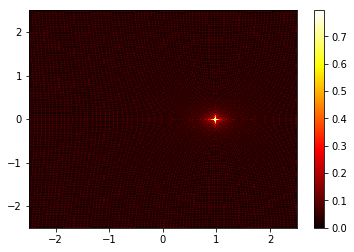

In [70]:
N_bins = 250

pixh=pix/2
x=vecsumx
y=vecsumy
#plt.figure(figsize=(7, 5))

plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , normed=True, cmap='hot')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , density=False, cmap='Spectral')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , normed=False, cmap='coolwarm')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , normed=True, cmap='rainbow')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]], normed=False, cmap='plasma')
cb = plt.colorbar()
#cb.set_label('Number of entries')


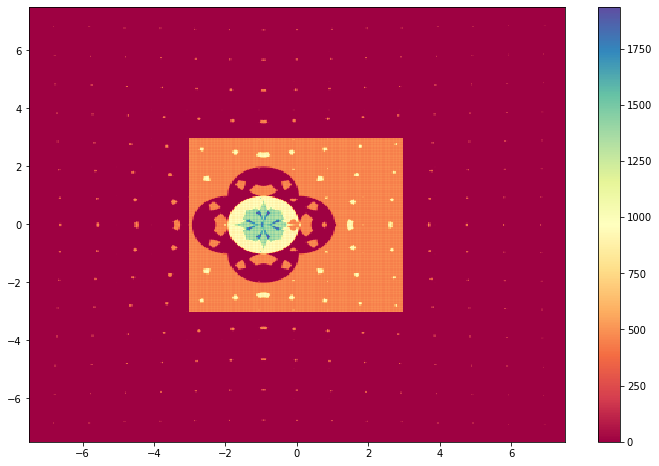

In [164]:
fil = open('INPUT')
lc = fil.readlines()
xx = []
yy= []

xl= []
yl= []

count=0
for l in lc:
    s = l.split()
    xx.append(float(s[0]))
    yy.append(float(s[1]))
    
    
N_bins = 350

pixh=pix/2
x=xx
y=yy
plt.figure(figsize=(12, 8))

#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , normed=True, cmap='hot')
plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , density=False, cmap='Spectral')
cb = plt.colorbar()
#     xl.append(int(s[5])/1000*PIXMAX0+X_POS)
#     yl.append(int(s[6])/1000*PIXMAX0+Y_POS)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import *
import random

objectx=[]
objecty=[]


NUMNUM=1000
numberline=NUMNUM
numberpoint=NUMNUM

pix=10

gamma=0.0
kappac=0.0

xx0=-pix
yy0=-pix
xxe=pix
yye=pix

dx=(xxe-xx0)/numberline
dy=(yye-yy0)/numberpoint

#-------double lense------#

# lensposx=[0.920, -0.920]
# lensposy=[0.0001, 0.0001]
# m=[0.2, 2, 1]

lensposx=[]
lensposy=[]
m=[]
power=-1.3
min_mass=0.1
max_mass=2
for l in range(1000):
    lensposx.append(random.uniform(-pix, pix))
    lensposy.append(random.uniform(-pix, pix))
    mm=random.random()
    m.append((mm*(max_mass**(1+power)-min_mass**(1+power))+min_mass**(1+power))**(1/(1+power)))


#print(m)
#------------------Calculation angle of deflaction-------------------#


def mvec(x, y):                       #modul of vector  
    return (x**2 + y**2)**0.5   

def theta(m, p):                      #function of deflection angle
    return m/(p)


vsumx=0.0
vsumy=0.0


vecsumx=[]
vecsumy=[]

for i in range(numberline):
    for j in range(numberpoint):
        objecty=j*dy+yy0
        objectx=i*dx+xx0
        
        for lens in range(len(lensposx)):
            modvec=mvec((lensposx[lens]-objectx),(lensposy[lens]-objecty))
            th=theta(m[lens], modvec)
            vecx=(lensposx[lens]-objectx)/modvec*th
            vecy=(lensposy[lens]-objecty)/modvec*th
            
            vsumx=vsumx+vecx
            vsumy=vsumy+vecy

        vecsumx.append(vsumx+objectx-kappac*objectx+gamma*objectx)
        vecsumy.append(vsumy+objecty-kappac*objecty-gamma*objecty)
        
        vsumx=0.0
        vsumy=0.0
    

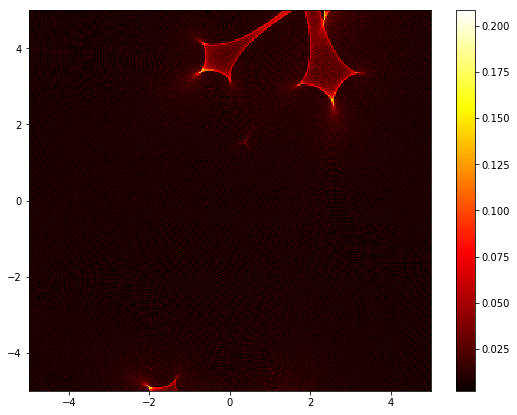

In [6]:
N_bins = 280

pixh=pix/2
x=vecsumx
y=vecsumy
plt.figure(figsize=(9, 7))

plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , normed=True, cmap='hot')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , density=False, cmap='Spectral')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , density=False, cmap='jet')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , normed=False, cmap='jet')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , normed=False, cmap='coolwarm')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , normed=True, cmap='rainbow')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]], normed=False, cmap='plasma')
cb = plt.colorbar()
#cb.set_label('Number of entries')
